### Part 2 of Task 1
- This notebook contains the remainig tasks 

In [1]:
#importing libraries , some libraries might be imported later based on the use case
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task # 1.6:
Feature Engineering in the Heart Disease Dataset
- Task: Create new features from existing ones in the Heart Disease dataset, such as age
groups, cholesterol levels, and more.
- Dataset: Heart Disease Dataset

In [5]:
#importing the dataset
file_path = 'heart_disease_data.csv'
heart_df = pd.read_csv(file_path)

heart_df.head(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [3]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Creating a new features

# 1. Age Groups
bins = [0, 35, 45, 55, 65, 100]
labels = ['<35', '35-44', '45-54', '55-64', '65+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=bins, labels=labels, right=False)

# 2. Cholesterol Levels
chol_bins = [0, 200, 240, 600]
chol_labels = ['Normal', 'High', 'Very High']
heart_df['chol_level'] = pd.cut(heart_df['chol'], bins=chol_bins, labels=chol_labels, right=False)

# 3. Binary Features for Blood Pressure (trestbps)
heart_df['high_trestbps'] = (heart_df['trestbps'] > 130).astype(int)

# 4. Interaction Features
heart_df['age_trestbps_interaction'] = heart_df['age'] * heart_df['trestbps']
heart_df['chol_trestbps_interaction'] = heart_df['chol'] * heart_df['trestbps']

# 5. Aggregated Features (for demonstration, we will use sex to group)
# Mean cholesterol by sex
heart_df['mean_chol_by_sex'] = heart_df.groupby('sex')['chol'].transform('mean')



In [8]:
heart_df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,chol_level,high_trestbps,age_trestbps_interaction,chol_trestbps_interaction,mean_chol_by_sex
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,55-64,High,1,9135,33785,239.289855
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,35-44,Very High,0,4810,32500,239.289855
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,35-44,High,0,5330,26520,261.302083


#### Explanation
- Age Groups: We categorized the age into five different groups.
- Cholesterol Levels: We categorized cholesterol levels into three categories: Normal, High, and Very High.
- Binary Features: We created a binary feature for blood pressure, where values greater than 130 are considered high.
- Interaction Features: We created interaction features between age and blood pressure, and cholesterol and blood pressure.
- Aggregated Features: We calculated the mean cholesterol level for each sex group and added it as a new feature.

### Task # 1.7:
. Transforming Variables in the Bike Sharing Dataset
- Task: Apply transformations like log, square root, and Box-Cox transformations to skewed
variables in the Bike Sharing dataset.
- Dataset: Bike Sharing Dataset

In [13]:
#importing the dataset
file_path = 'bikes_day.csv'
bike_df = pd.read_csv(file_path)
print(bike_df.isnull().sum())
bike_df.head(2)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


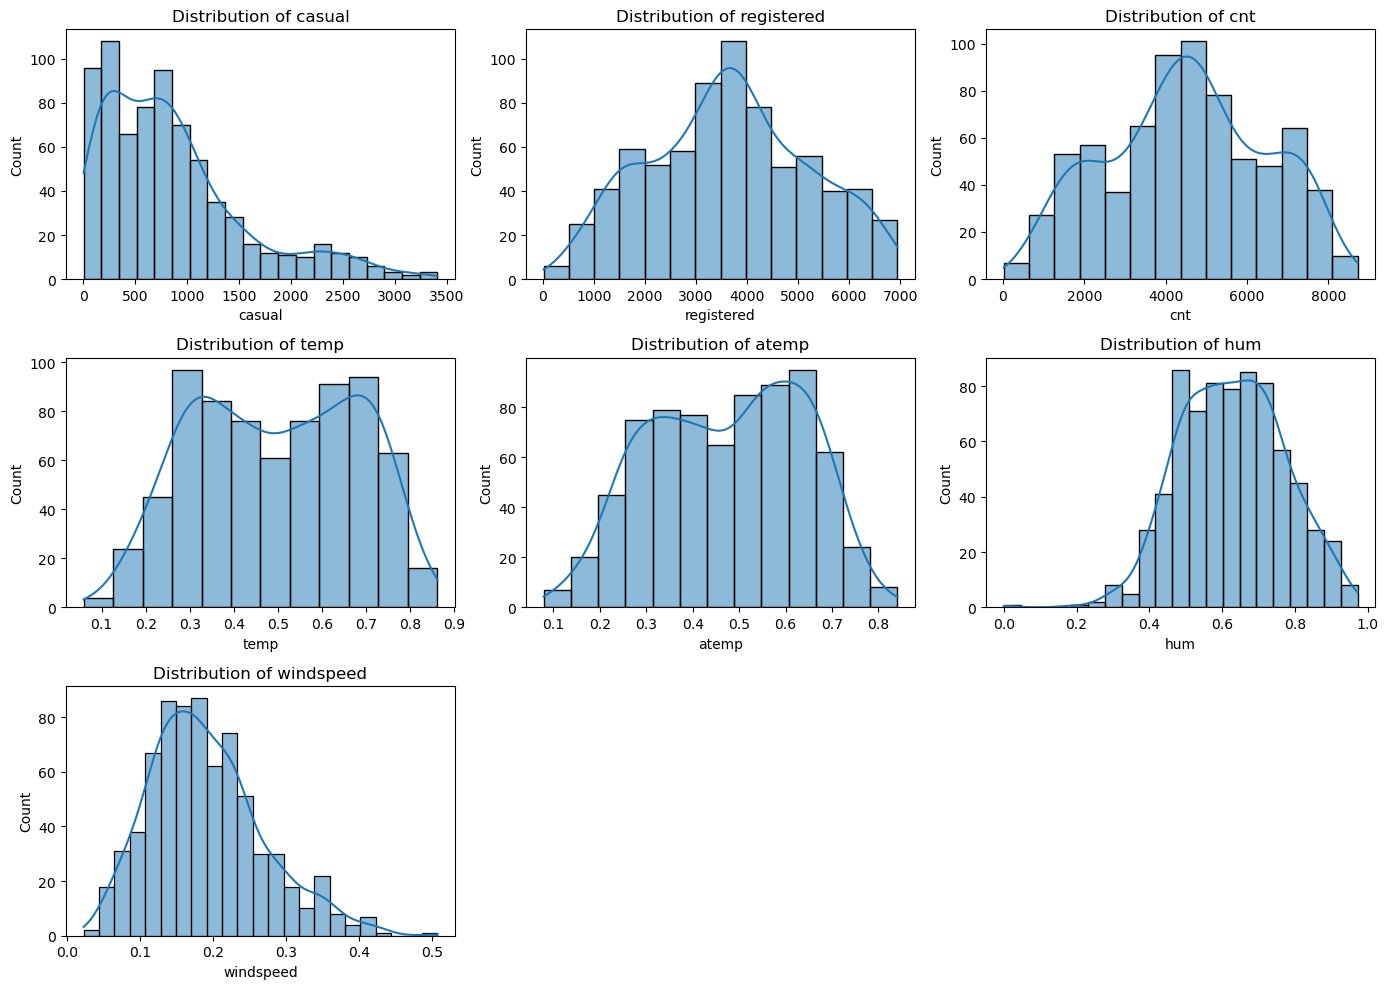

In [18]:
# Step 1: Visualizing the distributions of possible numerical features
numerical_features = ['casual', 'registered', 'cnt', 'temp', 'atemp', 'hum', 'windspeed']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(bike_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

- By looking at the graphs we will select **Distribution of Windspeed, Distribution of HUM, Distribution of casual**

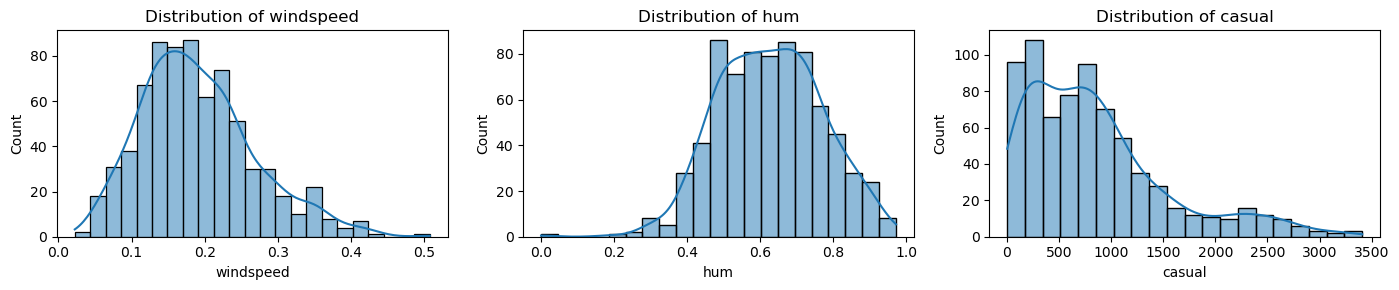

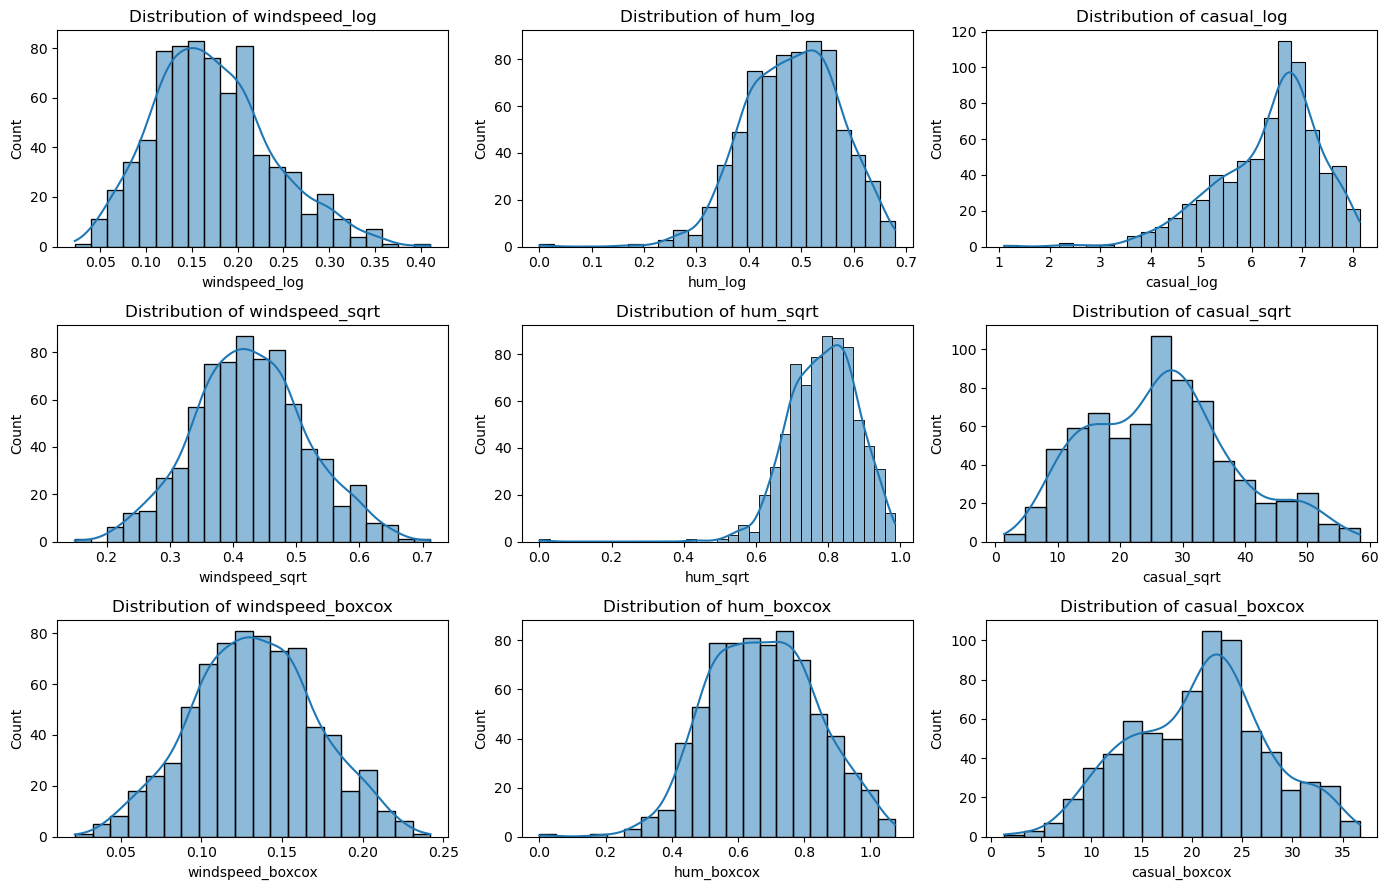

In [25]:
# Step 2: Visualizing the original distributions of 'windspeed', 'hum', and 'casual'
features_to_transform = ['windspeed', 'hum', 'casual']

plt.figure(figsize=(14, 3))
for i, col in enumerate(features_to_transform):
    plt.subplot(1, 3, i+1)
    sns.histplot(bike_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Step 3: Applying transformations to skewed features

# Log transformation (adding 1 to avoid log(0))
bike_df['windspeed_log'] = np.log1p(bike_df['windspeed'])
bike_df['hum_log'] = np.log1p(bike_df['hum'])
bike_df['casual_log'] = np.log1p(bike_df['casual'])

# Square root transformation
bike_df['windspeed_sqrt'] = np.sqrt(bike_df['windspeed'])
bike_df['hum_sqrt'] = np.sqrt(bike_df['hum'])
bike_df['casual_sqrt'] = np.sqrt(bike_df['casual'])

# Box-Cox transformation
# Adding 1 to avoid issues with zero values
# stats.boxcox provide support for the automatic and optimized lamda value , in our case we are using the automatic version while you can tune it manually aswell
bike_df['windspeed_boxcox'], _ = stats.boxcox(bike_df['windspeed'] + 1)  
bike_df['hum_boxcox'], _ = stats.boxcox(bike_df['hum'] + 1)
bike_df['casual_boxcox'], _ = stats.boxcox(bike_df['casual'] + 1)

# Step 4: Visualize the transformed distributions
transformed_features = ['windspeed_log', 'hum_log', 'casual_log',
                        'windspeed_sqrt', 'hum_sqrt', 'casual_sqrt',
                        'windspeed_boxcox', 'hum_boxcox', 'casual_boxcox']

plt.figure(figsize=(14, 9))
for i, col in enumerate(transformed_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(bike_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<details>
  <summary>Click to Check the summary of above Transformation Tecchniques</summary>

  ### 1. Log Transformation

  **Purpose:** Reduce skewness and make the distribution more normal-like  
  **Formula:** `log(x + 1)` or `np.log1p(x)`  
  **Effect:** Compresses large values and expands small values  
  **Use cases:** Skewed distributions, exponential growth, or when the data has a large range of values

  ### 2. Square Root Transformation

  **Purpose:** Reduce skewness and make the distribution more normal-like  
  **Formula:** `sqrt(x)`  
  **Effect:** Reduces the effect of extreme values and makes the distribution more symmetric  
  **Use cases:** Skewed distributions, count data, or when the data has a large range of values

  ### 3. Box-Cox Transformation

  **Purpose:** Stabilize variance and make the distribution more normal-like  
  **Formula:** `boxcox(x, lambda)`
  **Effect:** Finds the optimal power transformation to stabilize variance and make the distribution more normal-like  
  **Use cases:** Skewed distributions, non-normal data, or when the data has a large range of values

  ### Key Concepts:

  - **Skewness:** A measure of how asymmetric a distribution is.
  - **Normality:** A distribution that follows a bell-shaped curve.
  - **Variance stabilization:** Transforming data to have a constant variance across different levels of the predictor variable.
  - **Power transformation:** A family of transformations that raise the data to a power (e.g., log, square root, cube root).

  ### When to Use Each Technique:

  - **Log transformation:** When the data has a large range of values or is exponentially distributed.
  - **Square root transformation:** When the data is skewed and has a large range of values.
  - **Box-Cox transformation:** When the data is non-normal and has a large range of values, or when you're unsure which transformation to use.

</details>


### Task # 1.8:
Feature Selection in the Diabetes Dataset
- Task: Use techniques like correlation analysis, mutual information, and recursive feature
elimination (RFE) to select important features in the Diabetes dataset.
- Dataset: Diabetes Dataset

In [26]:
#importing the dataset
file_path = 'diabetes.csv'
diabetes_df = pd.read_csv(file_path)

print(diabetes_df.isnull().sum())
diabetes_df.head(2)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


#### 1. Correlation Analysis
Correlation analysis helps identify how features are related to each other and to the target variable. Features highly correlated with the target variable are usually more important.

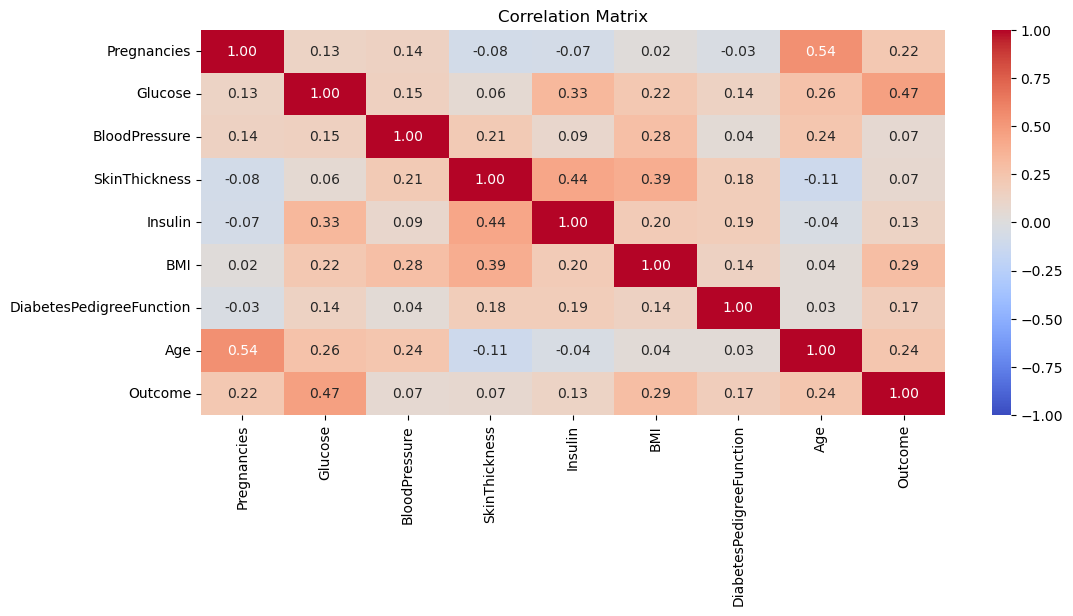

Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
diabetes_df = pd.read_csv('diabetes.csv')  # Replace with the correct path to your dataset

# Compute the correlation matrix
corr_matrix = diabetes_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable 'Outcome'
print("Correlation with Outcome:")
print(corr_matrix['Outcome'].sort_values(ascending=False))

#### 2. Mutual Information
Mutual information measures the dependency between features and the target variable. Higher mutual information indicates a stronger relationship.


In [31]:
from sklearn.feature_selection import mutual_info_classif

# Separate features and target
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information with Outcome:")
print(mi_df)

Mutual Information with Outcome:
                    Feature  Mutual Information
1                   Glucose            0.122383
5                       BMI            0.084635
4                   Insulin            0.050388
0               Pregnancies            0.048112
7                       Age            0.046550
3             SkinThickness            0.022810
6  DiabetesPedigreeFunction            0.009874
2             BloodPressure            0.000000


#### 3. Recursive Feature Elimination (RFE)
RFE is a feature selection technique that fits the model multiple times, each time removing the least significant features until the desired number of features is reached.

In [34]:
from sklearn.feature_selection import RFE
#Logistic Regression is suitable for binary classification problems, which is why it will be  used in this problem

from sklearn.linear_model import LogisticRegression


# Initialize the model
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features

# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

print("Selected Features by RFE:")
print(selected_features)

Selected Features by RFE:
Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


### Task # 1.9:
Dealing with Imbalanced Data in the Credit Card Fraud Detection Dataset
- Task: Handle imbalanced data in the Credit Card Fraud Detection dataset using
techniques like SMOTE, ADASYN, and undersampling.
- Dataset: Credit Card Fraud Detection Dataset

In [36]:
#importing the dataset
file_path = 'creditcard.csv'
credit_df = pd.read_csv(file_path)

print(credit_df.isnull().sum())
credit_df.head(3)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [37]:
#lets check the dataset target variable
credit_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

- as we can see that we have an unbalance dataset becasue 0's are 284315 and 1's are 492 and thats a huge difference and it can result into a biased outcome

#### 1. SMOTE (Synthetic Minority Over-sampling Technique)
- SMOTE creates synthetic samples of the minority class by interpolating between existing minority class instances. This helps to increase the size of the minority class, making the dataset more balanced.

In [39]:
from imblearn.over_sampling import SMOTE
X = credit_df.drop(columns=['Class'])
y = credit_df['Class']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [43]:
# Convert the resampled arrays back to DataFrames
X_smote_df = pd.DataFrame(X_smote, columns=X.columns)
y_smote_df = pd.DataFrame(y_smote, columns=['Class'])

# Combine X and y to view the complete DataFrame
smote_df = pd.concat([X_smote_df, y_smote_df], axis=1)

smote_df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

#### 2. ADASYN (Adaptive Synthetic Sampling)

- ADASYN is an extension of SMOTE that adaptively generates synthetic samples based on the density of the minority class instances.

In [40]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

In [44]:
# Convert the resampled arrays back to DataFrames
X_adasyn_df = pd.DataFrame(X_adasyn, columns=X.columns)
y_adasyn_df = pd.DataFrame(y_adasyn, columns=['Class'])

# Combine X and y to view the complete DataFrame
adasyn_df = pd.concat([X_adasyn_df, y_adasyn_df], axis=1)

adasyn_df['Class'].value_counts()

Class
0    284315
1    284298
Name: count, dtype: int64

#### 3. Undersampling

- Undersampling involves reducing the size of the majority class to match the size of the minority class. .

In [41]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [45]:
# Convert the resampled arrays back to DataFrames
X_rus_df = pd.DataFrame(X_rus, columns=X.columns)
y_rus_df = pd.DataFrame(y_rus, columns=['Class'])

# Combine X and y to view the complete DataFrame
rus_df = pd.concat([X_rus_df, y_rus_df], axis=1)
rus_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

### Task # 1.10:
. Combining Multiple Datasets in the Movie Lens Dataset
- Task: Combine and preprocess multiple related datasets from the Movie Lens dataset,
such as ratings, user information, and movie metadata.
- Dataset: Movie Lens Dataset

In [46]:
# Loading the datasets
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')

In [49]:
# A look at the datasets
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [50]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [51]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [52]:
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [54]:
# Preprocessing the datasets
ratings.dropna(inplace=True)  # Remove rows with missing values
tags.dropna(inplace=True)
movies.dropna(inplace=True)
links.dropna(inplace=True)

# Converting timestamp columns to datetime format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [55]:
#Step 1: Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='movieId')
ratings_movies.head(4)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller


In [56]:
ratings_movies_links = pd.merge(ratings_movies, links, on='movieId')
ratings_movies_links.head(4)

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0


In [57]:
combined_data = pd.merge(ratings_movies_links, tags, on=['userId', 'movieId'])
combined_data.head(6)

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,2,60756,5.0,2015-10-24 19:29:40,Step Brothers (2008),Comedy,838283,12133.0,funny,2000-07-30 18:45:03
1,2,60756,5.0,2015-10-24 19:29:40,Step Brothers (2008),Comedy,838283,12133.0,Highly quotable,2000-07-30 18:20:47
2,2,60756,5.0,2015-10-24 19:29:40,Step Brothers (2008),Comedy,838283,12133.0,will ferrell,2000-07-30 18:37:04
3,2,89774,5.0,2015-10-24 19:33:09,Warrior (2011),Drama,1291584,59440.0,Boxing story,2000-07-30 19:03:35
4,2,89774,5.0,2015-10-24 19:33:09,Warrior (2011),Drama,1291584,59440.0,MMA,2000-07-30 18:48:51
5,2,89774,5.0,2015-10-24 19:33:09,Warrior (2011),Drama,1291584,59440.0,Tom Hardy,2000-07-30 18:40:00


In [59]:
#timestamp_x is the timestamp when the user gave a rating to the movie.
#timestamp_y is the timestamp when the user added a tag to the movie.
combined_data = combined_data.rename(columns={'timestamp_x': 'rating_timestamp', 'timestamp_y': 'tag_timestamp'})
combined_data.head(2)

,userId,movieId,rating,rating_timestamp,title,genres,imdbId,tmdbId,tag,tag_timestamp
0,2,60756,5.0,2015-10-24 19:29:40,Step Brothers (2008),Comedy,838283,12133.0,funny,2000-07-30 18:45:03
1,2,60756,5.0,2015-10-24 19:29:40,Step Brothers (2008),Comedy,838283,12133.0,Highly quotable,2000-07-30 18:20:47


- Now we can export the above dataset in a format based on our requirement and liking also we can use it for further analysis